In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Nairobi Office Price Ex (2).csv')
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOC        14 non-null     object 
 1   FUR        14 non-null     object 
 2   AMB        14 non-null     object 
 3   PROX_SCH   14 non-null     object 
 4   PROX_ROAD  14 non-null     object 
 5   PROX_MALL  14 non-null     object 
 6   WATER      14 non-null     object 
 7   HK_SER     14 non-null     object 
 8   SIZE       14 non-null     float64
 9   PRICE      14 non-null     float64
dtypes: float64(2), object(8)
memory usage: 1.2+ KB


(        LOC  FUR          AMB PROX_SCH PROX_ROAD PROX_MALL WATER HK_SER  \
 0     karen  yes       serene       no       yes       yes   yes    yes   
 1  madaraka  yes  semi_serene      yes       yes       yes    no     no   
 2     karen   no        noisy       no       yes       yes   yes    yes   
 3     karen  yes  semi_serene       no        no        no   yes    yes   
 4  buruburu   no  semi_serene       no       yes       yes   yes    yes   
 
         SIZE      PRICE  
 0  32.502345  31.707006  
 1  53.426804  68.777596  
 2  61.530358  62.562382  
 3  47.475640  71.546632  
 4  59.813208  87.230925  ,
 None)

In [2]:
import numpy as np

# Extract the relevant columns for the regression task
data = data[['SIZE', 'PRICE']]
X = data['SIZE'].values
y = data['PRICE'].values

# Define Mean Squared Error (MSE) function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define Gradient Descent function to update slope (m) and intercept (c)
def gradient_descent(X, y, m, c, learning_rate):
    n = len(y)
    y_pred = m * X + c
    # Compute gradients
    dm = (-2 / n) * sum(X * (y - y_pred))
    dc = (-2 / n) * sum(y - y_pred)
    # Update weights
    m -= learning_rate * dm
    c -= learning_rate * dc
    return m, c

# Initialize parameters
m, c = np.random.rand(2)  # Random initial values for slope and intercept
learning_rate = 0.01
epochs = 10

# Train the model and print MSE for each epoch
errors = []
for epoch in range(epochs):
    y_pred = m * X + c
    error = mean_squared_error(y, y_pred)
    errors.append(error)
    print(f"Epoch {epoch + 1}, MSE: {error:.4f}")
    m, c = gradient_descent(X, y, m, c, learning_rate)

# Final model parameters
m, c, errors[-1]


Epoch 1, MSE: 4228.1388
Epoch 2, MSE: 10729776.8976
Epoch 3, MSE: 27720518540.5983
Epoch 4, MSE: 71616821514602.8125
Epoch 5, MSE: 185024285538284064.0000
Epoch 6, MSE: 478015995613655465984.0000
Epoch 7, MSE: 1234969190113340360228864.0000
Epoch 8, MSE: 3190581307998455959870504960.0000
Epoch 9, MSE: 8242966030605893941069000736768.0000
Epoch 10, MSE: 21295959081621870648153709238812672.0000


(-1.456815305227146e+17, -2828640462327186.0, 2.129595908162187e+34)

In [3]:
# Adjust the learning rate
learning_rate = 0.00001  # Lower the learning rate

# Reinitialize parameters
m, c = np.random.rand(2)
errors = []

# Retrain the model with adjusted learning rate
for epoch in range(epochs):
    y_pred = m * X + c
    error = mean_squared_error(y, y_pred)
    errors.append(error)
    print(f"Epoch {epoch + 1}, MSE: {error:.4f}")
    m, c = gradient_descent(X, y, m, c, learning_rate)

# Final model parameters after adjustment
m, c, errors[-1]


Epoch 1, MSE: 465.6340
Epoch 2, MSE: 426.1917
Epoch 3, MSE: 390.7319
Epoch 4, MSE: 358.8525
Epoch 5, MSE: 330.1919
Epoch 6, MSE: 304.4253
Epoch 7, MSE: 281.2603
Epoch 8, MSE: 260.4344
Epoch 9, MSE: 241.7112
Epoch 10, MSE: 224.8785


(1.1172130519335386, 0.9375690275768012, 224.87851502884374)

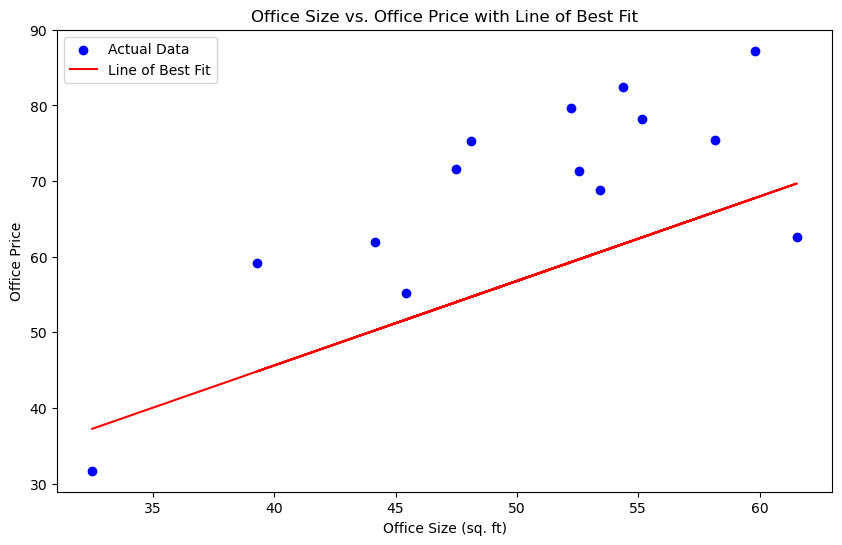

112.65887422093066

In [4]:
import matplotlib.pyplot as plt

# Plotting the data points and the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, m * X + c, color='red', label='Line of Best Fit')
plt.xlabel('Office Size (sq. ft)')
plt.ylabel('Office Price')
plt.title('Office Size vs. Office Price with Line of Best Fit')
plt.legend()
plt.show()

# Predict the office price when size is 100 sq. ft.
predicted_price = m * 100 + c
predicted_price
